In [1]:
# Install necessary libraries
!pip install nltk spacy scikit-learn tqdm

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import nltk
import spacy
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.svm import LinearSVC

In [3]:
from google.colab import files
import pandas as pd

# Upload the file
uploaded = files.upload()

# Extract the filename from the uploaded files dictionary
file_name = list(uploaded.keys())[0]

# Load the dataset into a pandas DataFrame
df = pd.read_csv('Indian_movies.csv')

Saving Indian_movies.csv to Indian_movies.csv


In [4]:
print(df.head())

   Unnamed: 0  Rank                          Movie Names  \
0           0     1  Ramayana: The Legend of Prince Rama   
1           1     2           Rocketry: The Nambi Effect   
2           2     3                              Nayakan   
3           3     4                             Gol Maal   
4           4     5                           Anbe Sivam   

                                               Links  Rating  Year  \
0  https://www.imdb.com//title/tt0259534/?ref_=fe...     9.2  1993   
1  https://www.imdb.com//title/tt9263550/?ref_=fe...     8.7  2022   
2  https://www.imdb.com//title/tt0093603/?ref_=fe...     8.6  1987   
3  https://www.imdb.com//title/tt0079221/?ref_=fe...     8.5  1979   
4  https://www.imdb.com//title/tt0367495/?ref_=fe...     8.6  2003   

  Duration_of_movie                                  Genere  \
0                PG  Animation,Action,Adventure,Back to top   
1            2h 37m             Biography,Drama,Back to top   
2         Not Rated          

In [5]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

In [6]:
# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [7]:
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Tokenize text
    words = word_tokenize(text)
    # Remove punctuation and stop words
    words = [word for word in words if word.isalpha()]
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

In [8]:
# Print the column names to check for the correct plot summary column name
print(df.columns)

Index(['Unnamed: 0', 'Rank', 'Movie Names', 'Links', 'Rating', 'Year',
       'Duration_of_movie', 'Genere', 'Description'],
      dtype='object')


In [9]:
# Apply preprocessing to the Description column
df['processed_description'] = df['Description'].apply(preprocess_text)
print(df.head())

   Unnamed: 0  Rank                          Movie Names  \
0           0     1  Ramayana: The Legend of Prince Rama   
1           1     2           Rocketry: The Nambi Effect   
2           2     3                              Nayakan   
3           3     4                             Gol Maal   
4           4     5                           Anbe Sivam   

                                               Links  Rating  Year  \
0  https://www.imdb.com//title/tt0259534/?ref_=fe...     9.2  1993   
1  https://www.imdb.com//title/tt9263550/?ref_=fe...     8.7  2022   
2  https://www.imdb.com//title/tt0093603/?ref_=fe...     8.6  1987   
3  https://www.imdb.com//title/tt0079221/?ref_=fe...     8.5  1979   
4  https://www.imdb.com//title/tt0367495/?ref_=fe...     8.6  2003   

  Duration_of_movie                                  Genere  \
0                PG  Animation,Action,Adventure,Back to top   
1            2h 37m             Biography,Drama,Back to top   
2         Not Rated          

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['processed_description'])


In [11]:
# Extract the target variable (assuming it's 'Genere')
y = df['Genere']

In [12]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
from sklearn.naive_bayes import MultinomialNB

# Initialize the classifier
clf = MultinomialNB()

# Train the classifier
clf.fit(X_train, y_train)


MultinomialNB()

In [14]:
from sklearn.metrics import accuracy_score, classification_report

# Make predictions on the test set
y_pred = clf.predict(X_test)


In [15]:
# Evaluate the predictions
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))

Accuracy: 0.1
                                     precision    recall  f1-score   support

Action,Adventure,Sci-Fi,Back to top       0.00      0.00      0.00         1
 Action,Biography,Crime,Back to top       0.00      0.00      0.00         2
 Action,Biography,Drama,Back to top       0.00      0.00      0.00         2
     Action,Crime,Drama,Back to top       0.10      1.00      0.19         5
  Action,Crime,Thriller,Back to top       0.00      0.00      0.00         3
           Action,Drama,Back to top       0.00      0.00      0.00         3
   Action,Drama,History,Back to top       0.00      0.00      0.00         1
   Action,Drama,Mystery,Back to top       0.00      0.00      0.00         1
     Action,Drama,Sport,Back to top       0.00      0.00      0.00         1
  Action,Drama,Thriller,Back to top       0.00      0.00      0.00         2
Adventure,Drama,Romance,Back to top       0.00      0.00      0.00         1
        Biography,Drama,Back to top       0.00      0.00     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [16]:
# Remove 'Back to top' from the 'Genere' column
df['Genere'] = df['Genere'].str.replace(',Back to top', '')
df['Genere'] = df['Genere'].str.strip()


In [17]:
# Display the distribution of genres
print(df['Genere'].value_counts())


Genere
Action,Crime,Drama        29
Drama                     18
Comedy,Drama              17
Comedy,Drama,Romance      16
Crime,Drama,Thriller      13
                          ..
Drama,Sci-Fi,Thriller      1
Drama,Romance,Thriller     1
Drama,History              1
Action,Adventure,Drama     1
Action,Adventure           1
Name: count, Length: 68, dtype: int64


In [18]:
# Remove 'Back to top' from the 'Genere' column
df['Genere'] = df['Genere'].str.replace(',Back to top', '', regex=False)
df['Genere'] = df['Genere'].str.strip()

# Display the cleaned distribution of genres
print(df['Genere'].value_counts())


Genere
Action,Crime,Drama        29
Drama                     18
Comedy,Drama              17
Comedy,Drama,Romance      16
Crime,Drama,Thriller      13
                          ..
Drama,Sci-Fi,Thriller      1
Drama,Romance,Thriller     1
Drama,History              1
Action,Adventure,Drama     1
Action,Adventure           1
Name: count, Length: 68, dtype: int64


In [19]:
from sklearn.utils import resample

# Get the genre counts
genre_counts = df['Genere'].value_counts()

# Determine the maximum number of samples for any genre
max_samples = genre_counts.max()

# Create an empty list to hold the balanced dataframes
balanced_dfs = []

# Resample each genre to the maximum number of samples
for genre in genre_counts.index:
    genre_df = df[df['Genere'] == genre]
    genre_df_balanced = resample(genre_df,
                                 replace=True,     # sample with replacement
                                 n_samples=max_samples,    # to match majority class
                                 random_state=42) # reproducible results
    balanced_dfs.append(genre_df_balanced)

# Combine all balanced dataframes
df_balanced = pd.concat(balanced_dfs)

# Display new class counts
print(df_balanced['Genere'].value_counts())


Genere
Action,Crime,Drama            29
Crime,Thriller                29
Animation,Action,Adventure    29
Action,Adventure,Sci-Fi       29
Comedy,Musical,Romance        29
                              ..
Comedy,Drama,Sci-Fi           29
Action,Adventure,Comedy       29
Adventure,Drama,Romance       29
Comedy,Drama,Fantasy          29
Action,Adventure              29
Name: count, Length: 68, dtype: int64


In [20]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [21]:
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Tokenize text
    words = word_tokenize(text)
    # Remove punctuation and stop words
    words = [word for word in words if word.isalpha()]
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

# Apply preprocessing to the Description column
df_balanced['processed_description'] = df_balanced['Description'].apply(preprocess_text)


In [22]:
# Feature Extraction
from sklearn.feature_extraction.text import TfidfVectorizer

# Use TF-IDF with bigrams and trigrams
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 3))
X = vectorizer.fit_transform(df_balanced['processed_description'])

# Extract the target variable
y = df_balanced['Genere']


In [23]:
# Split the Data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [24]:
# Train the Model
from sklearn.svm import LinearSVC

clf = LinearSVC()
clf.fit(X_train, y_train)


LinearSVC()

In [25]:
# Evaluate the Model
from sklearn.metrics import accuracy_score, classification_report

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))


Accuracy: 0.9873417721518988
                            precision    recall  f1-score   support

          Action,Adventure       1.00      1.00      1.00         5
   Action,Adventure,Comedy       1.00      1.00      1.00         2
    Action,Adventure,Crime       1.00      1.00      1.00         8
    Action,Adventure,Drama       1.00      1.00      1.00         6
   Action,Adventure,Sci-Fi       1.00      1.00      1.00        12
    Action,Biography,Crime       1.00      1.00      1.00         4
    Action,Biography,Drama       1.00      1.00      1.00         5
       Action,Comedy,Crime       1.00      1.00      1.00         5
       Action,Comedy,Drama       1.00      1.00      1.00         3
     Action,Comedy,Romance       1.00      1.00      1.00         8
    Action,Comedy,Thriller       1.00      1.00      1.00         6
        Action,Crime,Drama       1.00      1.00      1.00         1
     Action,Crime,Thriller       1.00      1.00      1.00         6
              Acti

In [26]:
import pickle

# Save the model
with open('movie_genre_predictor.pkl', 'wb') as model_file:
    pickle.dump(clf, model_file)

# Save the vectorizer
with open('tfidf_vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(vectorizer, vectorizer_file)


In [27]:
import pickle
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')

# Load the trained model
with open('movie_genre_predictor.pkl', 'rb') as model_file:
    clf = pickle.load(model_file)

# Load the vectorizer
with open('tfidf_vectorizer.pkl', 'rb') as vectorizer_file:
    vectorizer = pickle.load(vectorizer_file)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [28]:
# Preprocess the text
def preprocess_text(text):
    text = text.lower()
    words = word_tokenize(text)
    words = [word for word in words if word.isalpha()]
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

In [29]:
# Function to predict the genre
def predict_genre(description):
    processed_description = preprocess_text(description)
    X_input = vectorizer.transform([processed_description])
    predicted_genre = clf.predict(X_input)
    return predicted_genre[0]

# Manually enter a movie description
movie_description = input("Enter the movie description: ")

# Predict the genre
predicted_genre = predict_genre(movie_description)

# Print the predicted genre
print(f'The predicted genre is: {predicted_genre}')

Enter the movie description: Based on the life of Indian Space Research Organization scientist Nambi Narayanan, who was framed for being a spy and arrested in 1994. Though free, he continues to fight for justice against
The predicted genre is: Biography,Drama


Accuracy: 0.9873417721518988
                            precision    recall  f1-score   support

          Action,Adventure       1.00      1.00      1.00         5
   Action,Adventure,Comedy       1.00      1.00      1.00         2
    Action,Adventure,Crime       1.00      1.00      1.00         8
    Action,Adventure,Drama       1.00      1.00      1.00         6
   Action,Adventure,Sci-Fi       1.00      1.00      1.00        12
    Action,Biography,Crime       1.00      1.00      1.00         4
    Action,Biography,Drama       1.00      1.00      1.00         5
       Action,Comedy,Crime       1.00      1.00      1.00         5
       Action,Comedy,Drama       1.00      1.00      1.00         3
     Action,Comedy,Romance       1.00      1.00      1.00         8
    Action,Comedy,Thriller       1.00      1.00      1.00         6
        Action,Crime,Drama       1.00      1.00      1.00         1
     Action,Crime,Thriller       1.00      1.00      1.00         6
              Acti

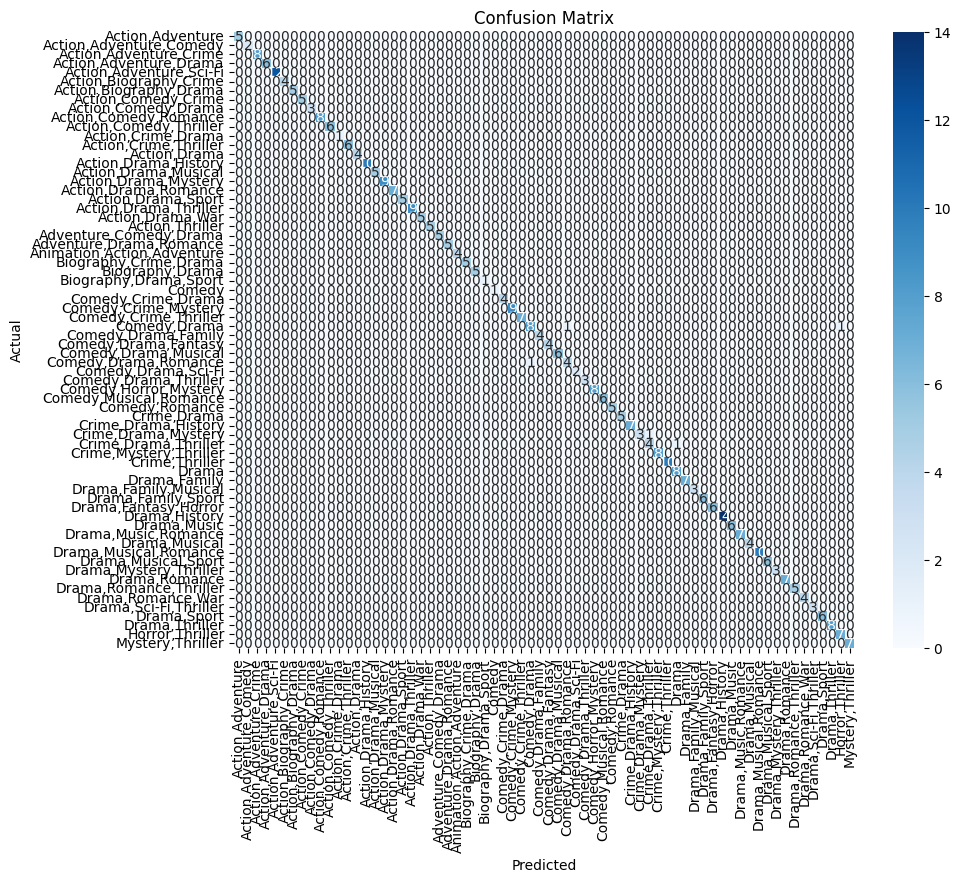

In [30]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Print classification report
print(classification_report(y_test, y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [31]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(clf, X, y, cv=5)

# Print the cross-validation scores
print(f'Cross-validation scores: {cv_scores}')
print(f'Mean cross-validation score: {cv_scores.mean()}')


Cross-validation scores: [0.99493671 0.98734177 0.98477157 0.97208122 0.96192893]
Mean cross-validation score: 0.9802120413801966
